In [3]:
import sys
import os
import pandas as pd
import numpy as np 
import folium   
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from sklearn.preprocessing import StandardScaler

sys.path.append(os.path.abspath('..')) 

from utils.preproc_utils import *
from utils.eda_utils import *

## **Data Import and Cleaning**

In [2]:
base_dir = os.path.abspath(os.path.join(os.getcwd(), '../../data/raw'))

basket_path = os.path.join(base_dir, 'customer_basket.csv')
customer_info_path = os.path.join(base_dir, 'customer_info.csv')
product_path = os.path.join(base_dir, 'product_mapping.xlsx')

basket = pd.read_csv(basket_path, index_col='invoice_id')
customer_info = pd.read_csv(customer_info_path, index_col='customer_id')
product = pd.read_excel(product_path)

In [4]:
customer_info_clean = clean_customer_data(customer_info)

customer_info_clean['city'] = customer_info_clean.apply(lambda row: assign_city(row['latitude'], row['longitude']), axis=1)
customer_info_clean.drop(['latitude', 'longitude'], axis=1, inplace=True)

customer_info_clean.head(2)

## **Distribution Analysis**

### **Continuous Variables**

In [25]:
# note: 'total_distinct_products' is being treated as a continuous variable
customer_info_cont = ['spend_groceries', 'spend_electronics', 'spend_vegetables', 'spend_nonalcohol_drinks', 'spend_alcohol_drinks',
                      'spend_meat', 'spend_fish', 'spend_hygiene', 'spend_videogames', 'spend_petfood', 'percentage_of_products_bought_promotion', 'total_distinct_products']

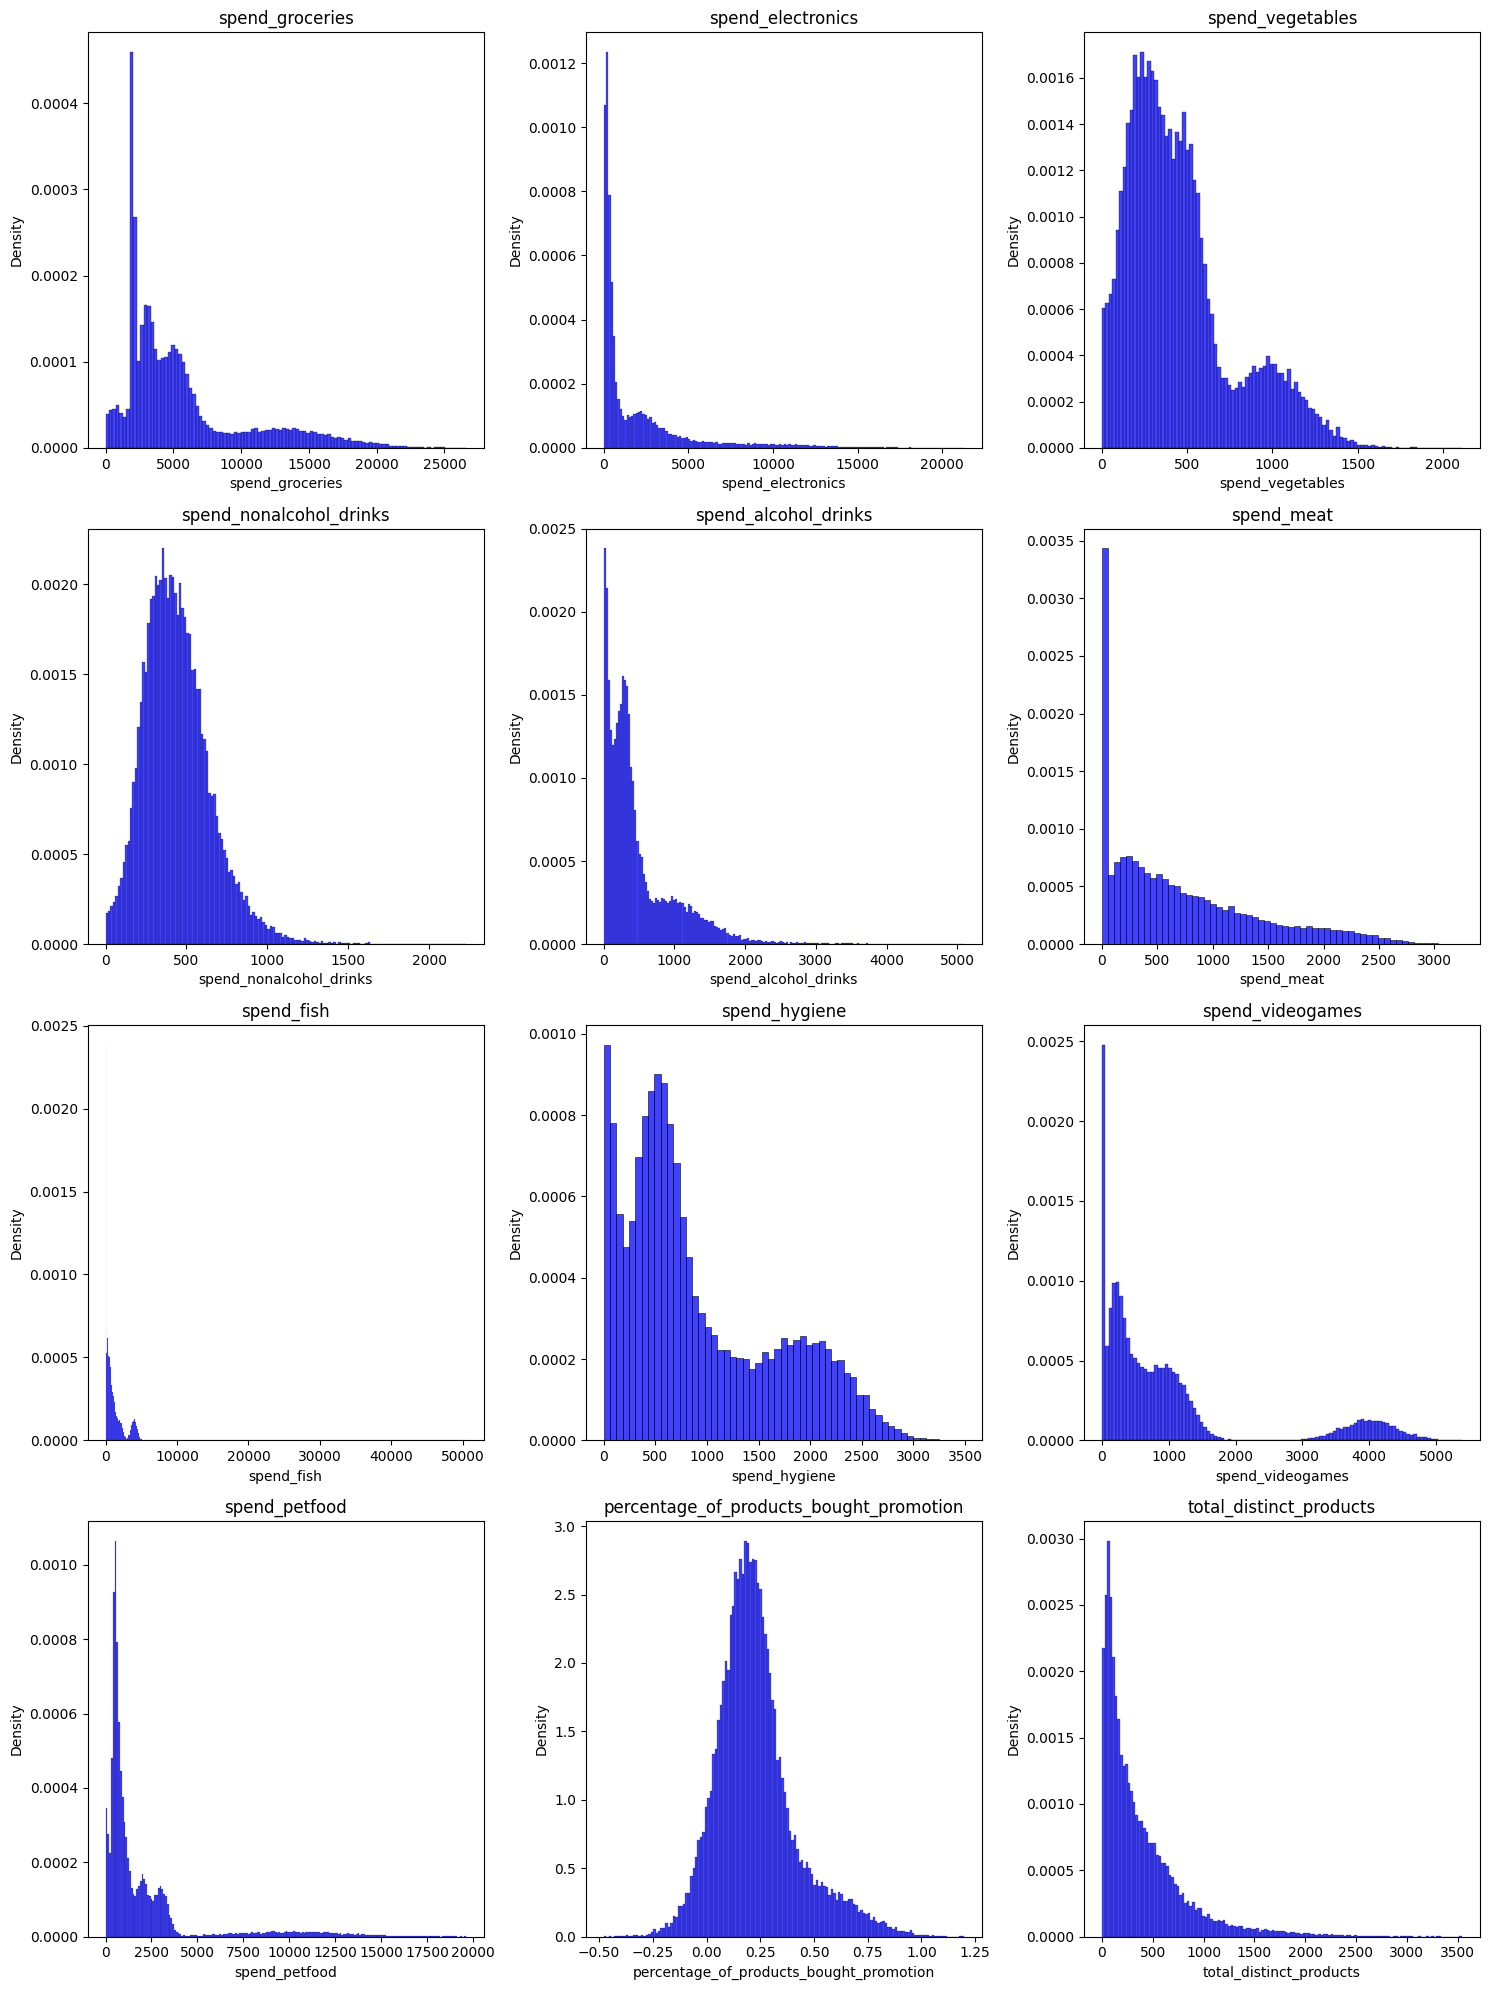

In [26]:
var_plotter(customer_info_clean, customer_info_cont)

The continuous variables are mostly right-skewed. Square Root Transformation is a viable option

c:\Users\vic\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\internals\blocks.py:351: RuntimeWarning: invalid value encountered in sqrt
  result = func(self.values, **kwargs)


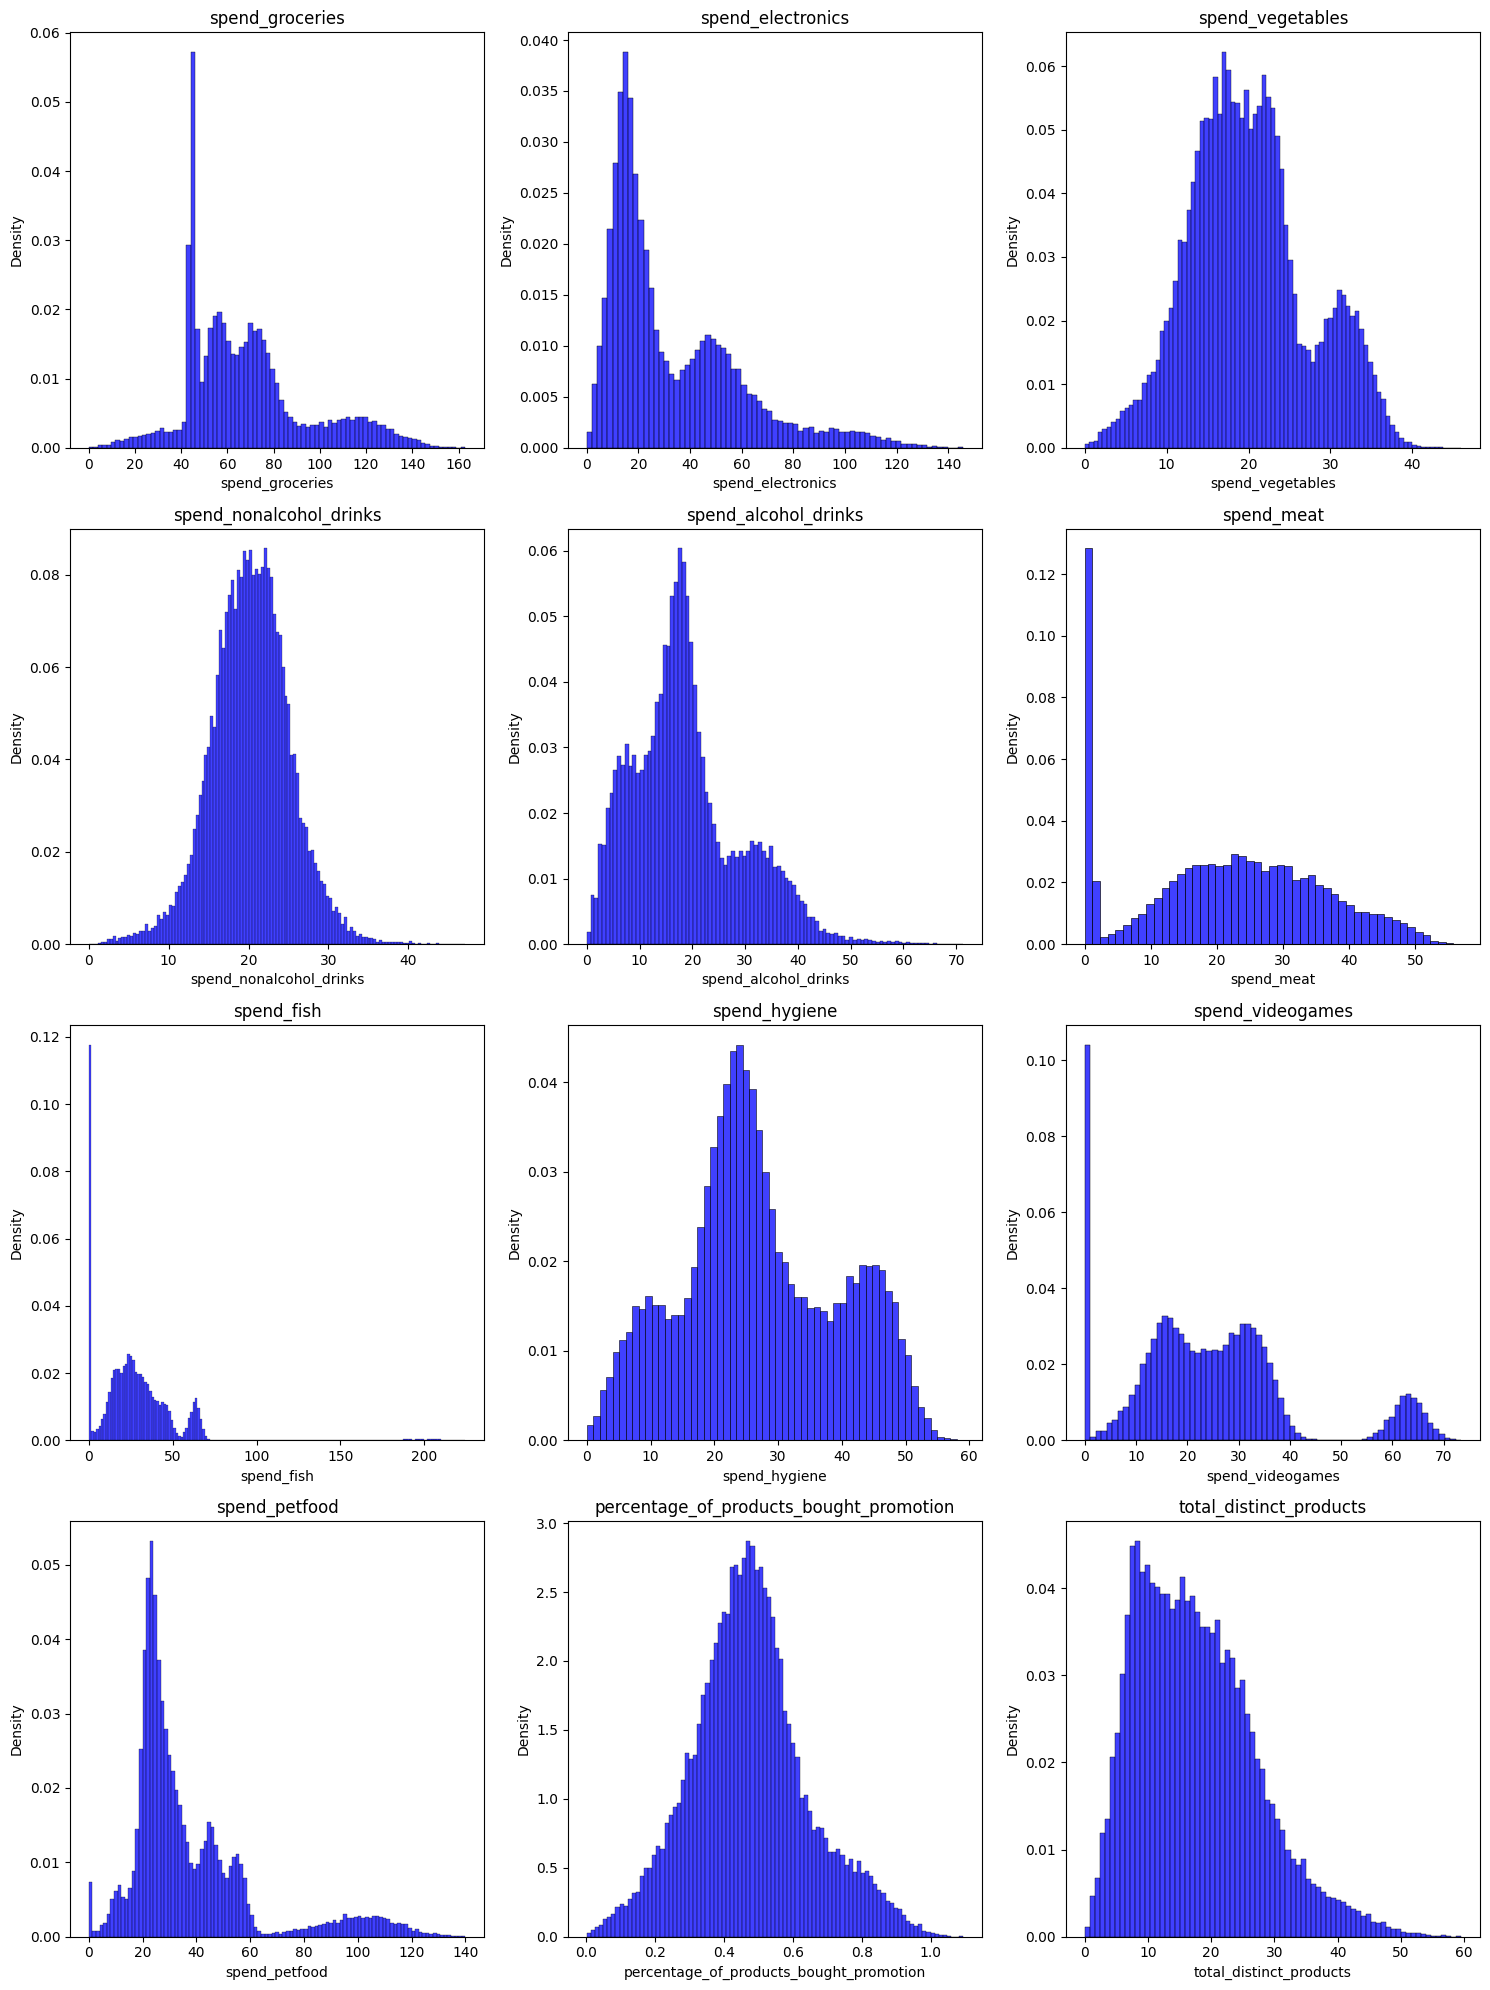

In [27]:
customer_info_log = np.sqrt(customer_info_clean[customer_info_cont])
var_plotter(customer_info_log, customer_info_cont)

### **Discrete Variables**

In [28]:
customer_info_disc = ['kids_home', 'teens_home', 'number_complaints', 'distinct_stores_visited', 'typical_hour', 'age', 'years_as_customer', 'educ_years']

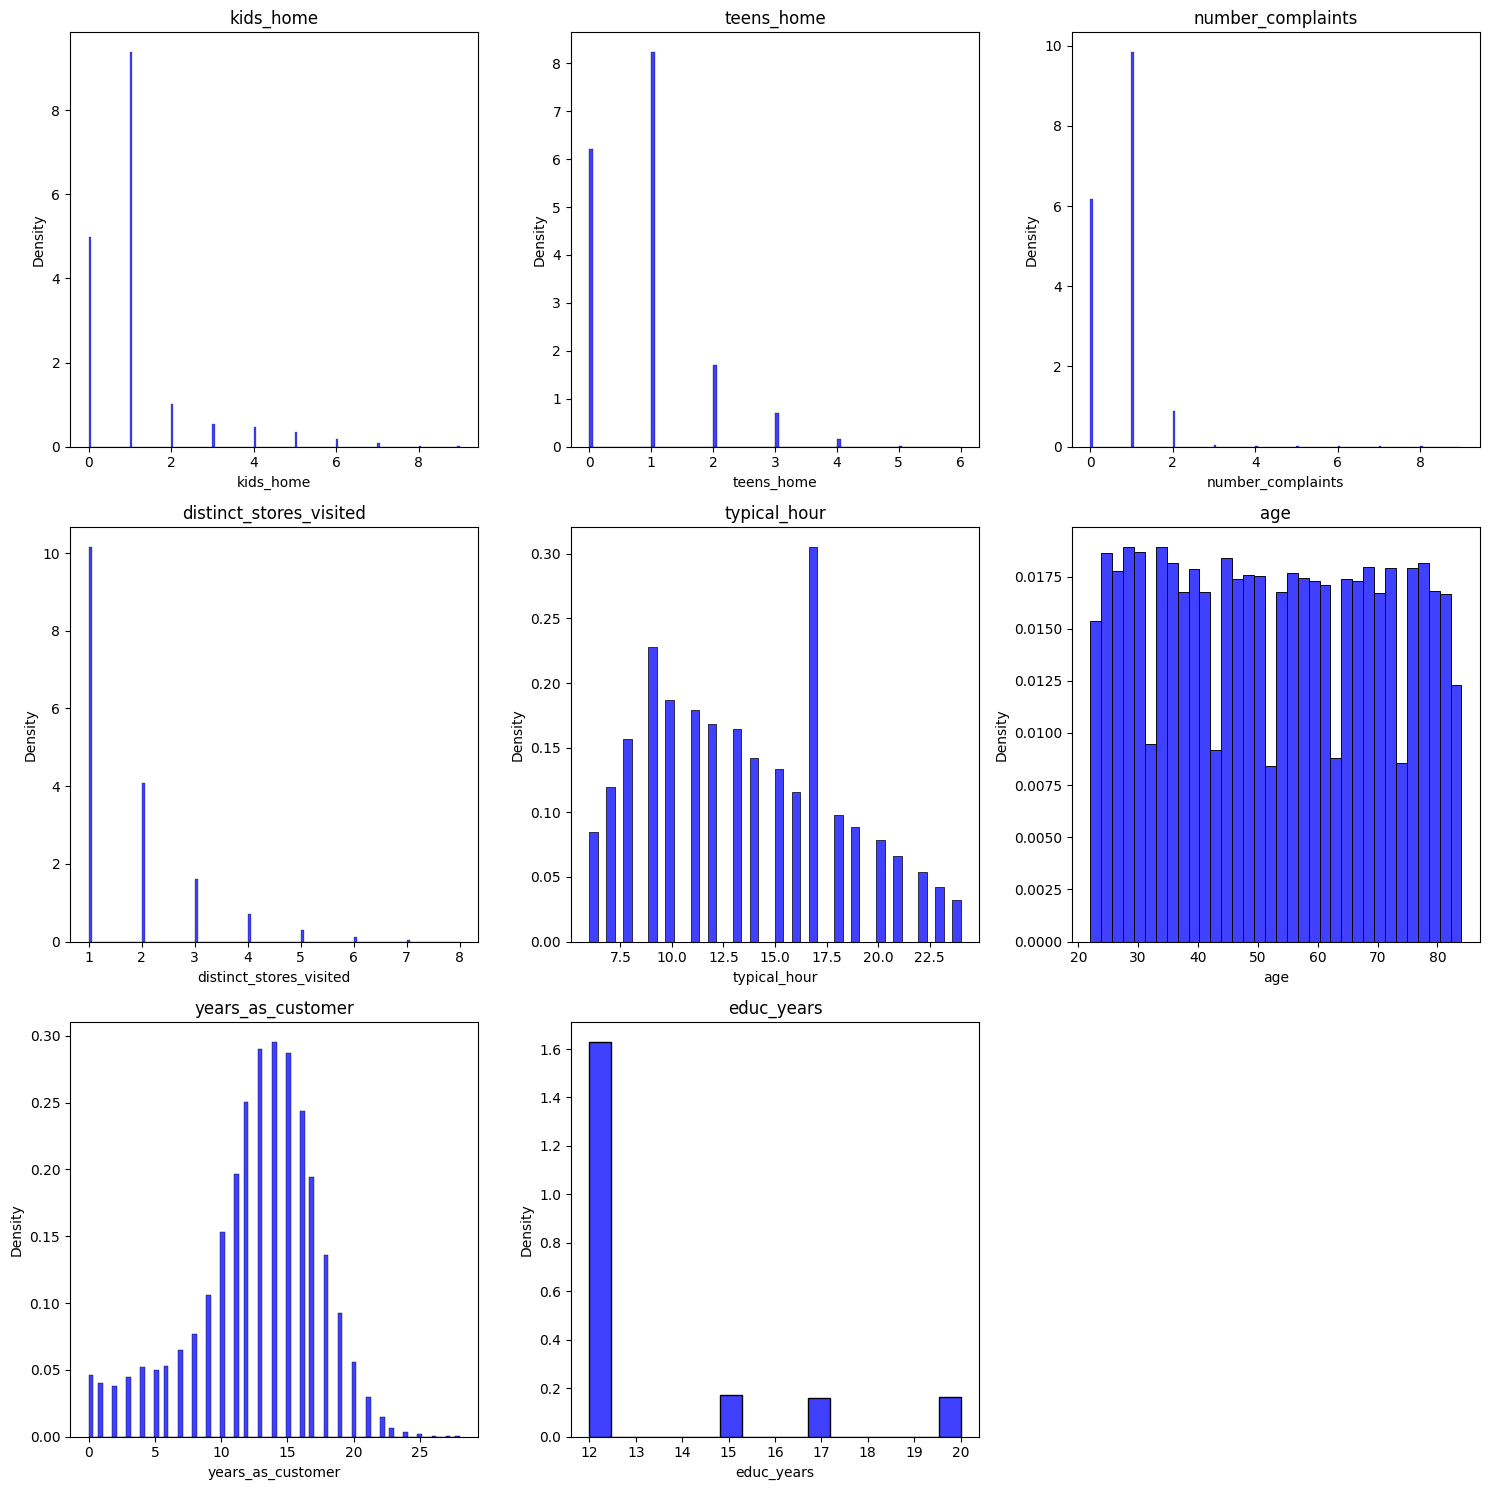

In [29]:
var_plotter(customer_info_clean, customer_info_disc)

### **Categorical Variables**

In [30]:
# city and gender

## **Missing Values and Inconsistency Checking**

In [31]:
basket.isna().sum()

list_of_goods    0
customer_id      0
dtype: int64

In [32]:
product.isna().sum()

product_name    0
category        0
dtype: int64

In [33]:
customer_info_clean.isna().sum()

kids_home                                   524
teens_home                                 1021
number_complaints                           654
distinct_stores_visited                    1309
spend_groceries                               0
spend_electronics                             0
typical_hour                               1745
spend_vegetables                            873
spend_nonalcohol_drinks                       0
spend_alcohol_drinks                          0
spend_meat                                    0
spend_fish                                 1309
spend_hygiene                                 0
spend_videogames                              0
spend_petfood                                 0
total_distinct_products                       0
percentage_of_products_bought_promotion       0
age                                           0
loyalty_member                                0
years_as_customer                             0
educ_years                              

In [35]:
missing_percentage_per_column = round(((customer_info_clean.isnull().sum() / len(customer_info_clean)) * 100), 2)

columns_with_missing_values = missing_percentage_per_column[missing_percentage_per_column > 0]

total_missing_percentage = (customer_info_clean.isnull().sum().sum() / (customer_info_clean.shape[0] * customer_info_clean.shape[1])) * 100

print("Percentage of missing values in each column with missing data:")
print(columns_with_missing_values)
print("\nPercentage of missing values in the entire DataFrame:", round(total_missing_percentage, 2))

Percentage of missing values in each column with missing data:
kids_home                  1.20
teens_home                 2.34
number_complaints          1.50
distinct_stores_visited    3.00
typical_hour               4.00
spend_vegetables           2.00
spend_fish                 3.00
dtype: float64

Percentage of missing values in the entire DataFrame: 0.74


### **Inconsistency Checking**


In [37]:
datasets = {
    "basket": basket,
    "customer_info_refactored": customer_info_clean,
    "product": product
}

for name, dataset in datasets.items():
    print(f"Number of duplicates removed from the {name} dataset: {dataset.duplicated().sum()}")
    dataset.drop_duplicates(inplace=True)


Number of duplicates removed from the basket dataset: 0
Number of duplicates removed from the customer_info_refactored dataset: 0
Number of duplicates removed from the product dataset: 1
